# DS-NYC-45 | Final Project 4: Modeling Performance

#### 1) Load Relevant Libraries and Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as skl
from sklearn import ensemble, metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor,ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score,train_test_split

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
users = pd.read_csv(os.path.join('project_dataset', 'user_data.csv'), index_col='user_id')
res = pd.read_csv(os.path.join('project_dataset', 'reservations_data.csv'), index_col='user_id')

#### 2) Combine & Clean Data

In [3]:
df = pd.concat([users, res], axis=1, join_axes=[users.index])

In [4]:
df = df.fillna(0)
df.head()

,is_converted,lead_created_month,lead_created_day_of_week,is_paidsocial_lead,is_organic_lead,is_seo_studios,is_inviteafriend,is_email,is_referral,is_paidsocial,is_organic,user_acquisition_month,user_acquisition_day_of_week,promo_days,lead_to_promo_days,is_three_studio_visits,is_two_studio_visits,is_four_studio_visits,is_onboarded,user_country,user_msa_id,avg_class_rating,avg_days_from_booking_to_class,avg_peak_classes,reservations_attended_barre_count,reservations_attended_boxing_count,reservations_attended_cycling_count,reservations_attended_dance_count,reservations_attended_gym_count,reservations_attended_martial_arts_count,reservations_attended_pilates_count,reservations_attended_rowing_count,reservations_attended_strength_training_count,reservations_attended_yoga_count,reservations_attended_t1_count,reservations_attended_t2_count,reservations_attended_t3_count,reservations_attended_count,reservations_missed_count,reservations_late_cancelled_count,cost_of_all_reservations_in_usd_no_tax,distinct_venues_count
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,0,5,4,0,1,0,0,0,0,0,1,9.0,3.0,0.0,0,1,0,0,1,1.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0,5,5,0,1,0,0,0,0,0,1,9.0,3.0,0.0,0,1,0,0,1,1.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1,6,1,0,1,0,0,0,0,0,1,9.0,1.0,0.0,0,0,1,0,1,1.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1,7,3,0,1,0,0,0,0,0,1,8.0,4.0,0.0,0,1,0,0,1,1.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,1,6,1,0,1,0,0,0,0,0,0,8.0,3.0,30.0,429,0,1,0,1,1.0,1.0,5.0,1.25,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,25.0,2.0


In [5]:
df.shape

(592322, 42)

In [6]:
df.dtypes

is_converted                                       int64
lead_created_month                                 int64
lead_created_day_of_week                           int64
is_paidsocial_lead                                 int64
is_organic_lead                                    int64
is_seo_studios                                     int64
is_inviteafriend                                   int64
is_email                                           int64
is_referral                                        int64
is_paidsocial                                      int64
is_organic                                         int64
user_acquisition_month                           float64
user_acquisition_day_of_week                     float64
promo_days                                       float64
lead_to_promo_days                                 int64
is_three_studio_visits                             int64
is_two_studio_visits                               int64
is_four_studio_visits          

#### 3) Split Data into X, Y, test & train

In [7]:
X = df.drop('is_converted', axis=1)
y = df['is_converted'].astype(int)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 4) Create Calculation for Model Results

In [9]:
def format_model_results(sklearn_model, X_train, X_test, y_train, y_test):
    # Get the model's class name (E.g. LogisticRegression, KNearestNeighbor, etc.) and store it to a string
    model_class_name = sklearn_model.__class__.__name__  
    
    y_test_pred   = sklearn_model.predict(X_test)
    y_train_pred  = sklearn_model.predict(X_train)

    accuracy_score  = metrics.accuracy_score(y_test, y_test_pred)
    precision_score = metrics.precision_score(y_test, y_test_pred, average='binary')
    recall_score    = metrics.recall_score(y_test, y_test_pred, average='binary')
    f1_score        = metrics.f1_score(y_test, y_test_pred, average='binary')
    f1_score_train  = metrics.f1_score(y_train, y_train_pred, average='binary')
    
    return pd.DataFrame({
            "Accuracy": accuracy_score, 
            "Precision": precision_score, 
            "Recall": recall_score, 
            "F1 score": f1_score, 
            "F1 score (train)": f1_score_train
        }, index=[model_class_name])

#### 5) Run Feature Extraction Models
##### Model A: Decision Tree Classifier`

In [10]:
dtc = DecisionTreeClassifier()    
dtc.fit(X, y)

def build_tree_image(dtc):
    dotfile = open("tree.dot", 'w')
    export_graphviz(dtc, out_file = dotfile, feature_names = X.columns)
    dotfile.close()
    os.system("dot -Tpng tree.dot -o tree.png")

dtc = DecisionTreeClassifier(
                max_depth = 5,
                min_samples_leaf = 10)

dtc.fit(X, y)
build_tree_image(dtc)

In [11]:
dtc = DecisionTreeClassifier(
                max_depth = 5,
                min_samples_leaf = 10)

dtc.fit(X, y)
build_tree_image(dtc)

In [12]:
format_model_results(dtc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
DecisionTreeClassifier,0.757067,0.811689,0.811534,0.815526,0.807888


##### Model B: Random Forest Classifier

In [13]:
rfc = RandomForestClassifier(n_estimators = 30)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [14]:
format_model_results(rfc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
RandomForestClassifier,0.789237,0.837828,0.996044,0.835581,0.840087


In [15]:
features = X.columns
feature_importances = rfc.feature_importances_

features_rfc = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_rfc.sort_values('Importance Score', inplace=True, ascending=False)

print features_rfc

                                         Features  Importance Score
12                                     promo_days          0.119544
39         cost_of_all_reservations_in_usd_no_tax          0.078584
10                         user_acquisition_month          0.069376
40                          distinct_venues_count          0.051987
36                    reservations_attended_count          0.049700
19                                    user_msa_id          0.047134
22                               avg_peak_classes          0.046083
21                 avg_days_from_booking_to_class          0.043503
0                              lead_created_month          0.043328
20                               avg_class_rating          0.036276
13                             lead_to_promo_days          0.033842
11                   user_acquisition_day_of_week          0.032234
1                        lead_created_day_of_week          0.030158
9                                      is_organi

In [16]:
scores = cross_val_score(rfc, X, y, scoring='accuracy')
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

for n_trees in range(1, 211, 30):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='accuracy')
    print('n trees: {}, CV accuracy {}, Average accuracy {}'.format(n_trees, scores, scores.mean()))

CV Accuracy [ 0.65603902  0.47516473  0.39117707], Average Accuracy 0.507460272819
n trees: 1, CV accuracy [ 0.65822195  0.49679145  0.40885839], Average accuracy 0.521290594588
n trees: 31, CV accuracy [ 0.6552793   0.47927735  0.38775324], Average accuracy 0.507436631286
n trees: 61, CV accuracy [ 0.65528943  0.47701339  0.41244429], Average accuracy 0.514915700461
n trees: 91, CV accuracy [ 0.65493489  0.47741351  0.41264688], Average accuracy 0.514998425938
n trees: 121, CV accuracy [ 0.65495009  0.47633977  0.41864364], Average accuracy 0.516644497417
n trees: 151, CV accuracy [ 0.65513242  0.47608653  0.4099372 ], Average accuracy 0.513718714177
n trees: 181, CV accuracy [ 0.65503112  0.47675002  0.40670583], Average accuracy 0.512828991455


##### Model C: Extra Trees Classifier

In [17]:
etc = ExtraTreesClassifier()
etc.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

                                               importance
feature                                                  
user_acquisition_month                              0.067
avg_peak_classes                                    0.064
promo_days                                          0.063
is_organic                                          0.057
avg_class_rating                                    0.055
lead_created_month                                  0.046
is_onboarded                                        0.045
user_msa_id                                         0.045
cost_of_all_reservations_in_usd_no_tax              0.034
user_acquisition_day_of_week                        0.033
avg_days_from_booking_to_class                      0.032
lead_to_promo_days                                  0.031
lead_created_day_of_week                            0.031
is_three_studio_visits                              0.029
reservations_attended_t1_count                      0.028
distinct_venue

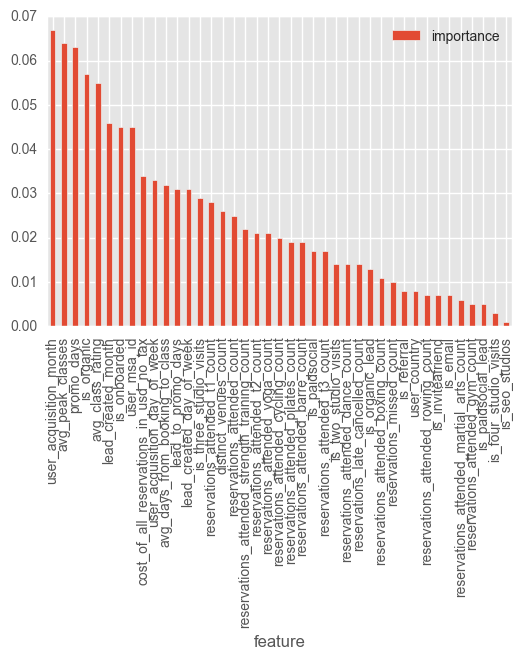

In [18]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(etc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print importances
importances.plot.bar()

In [19]:
format_model_results(etc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
ExtraTreesClassifier,0.994817,0.995994,0.996049,0.997817,0.994178


#### 6) Drop Variables from Model

In [33]:
df2 = df[['is_converted','is_organic','promo_days','user_acquisition_month','cost_of_all_reservations_in_usd_no_tax','avg_class_rating','avg_peak_classes','avg_days_from_booking_to_class','user_msa_id','is_onboarded','distinct_venues_count']]

In [34]:
X = df2.drop('is_converted', axis=1)
y = df2['is_converted'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
df2.shape

(592322, 11)

#### Rerun Model A: Decision Tree Classifier

In [36]:
dtc = DecisionTreeClassifier( max_depth = 5, min_samples_leaf = 10)

dtc.fit(X, y)
build_tree_image(dtc)

format_model_results(dtc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
DecisionTreeClassifier,0.753556,0.806721,0.806842,0.82412,0.790041


#### Rerun Model B: Random Forest Classifier

In [37]:
rfc = RandomForestClassifier(n_estimators = 30)
rfc.fit(X_train, y_train)

format_model_results(rfc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
RandomForestClassifier,0.772785,0.826166,0.984677,0.822961,0.829396


#### Rerun Model C: Extra Trees Classifier

In [38]:
etc = ExtraTreesClassifier()
etc.fit(X, y)

format_model_results(etc, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
ExtraTreesClassifier,0.980095,0.984658,0.984628,0.988181,0.981159


#### Run Model D: Logistic Regression

In [39]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
logreg = LogisticRegression(penalty='l2', C=10)

In [40]:
logreg.fit(X_train_std, y_train)
zip(X, logreg.coef_[0])

[('is_organic', 1.2942891076800298),
 ('promo_days', -0.19066898573859475),
 ('user_acquisition_month', 0.3654403706197954),
 ('cost_of_all_reservations_in_usd_no_tax', 0.38430655759177024),
 ('avg_class_rating', -0.30479621954241409),
 ('avg_peak_classes', -0.13080994788250117),
 ('avg_days_from_booking_to_class', -0.11639629594196942),
 ('user_msa_id', -0.089556729592743314),
 ('is_onboarded', 0.35501894932235828),
 ('distinct_venues_count', 0.26417005521197212)]

In [41]:
y_pred_class = logreg.predict(X_test_std)

In [42]:
format_model_results(logreg, X_train, X_test, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
LogisticRegression,0.675997,0.791855,0.791175,0.680533,0.946719


#### Run Model E: K Nearest Neighbors

In [43]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=15,weights='uniform', p=2)
score = cross_val_score(knn, X_train_std, y_train, scoring='accuracy')
print score

[ 0.76408805  0.76500456  0.76403591]


In [44]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [46]:
format_model_results(knn, X_train_std, X_test_std, y_train, y_test)

,Accuracy,F1 score,F1 score (train),Precision,Recall
KNeighborsClassifier,0.653459,0.786517,0.784929,0.656567,0.980602
